In [1]:
pip install easyocr

Note: you may need to restart the kernel to use updated packages.


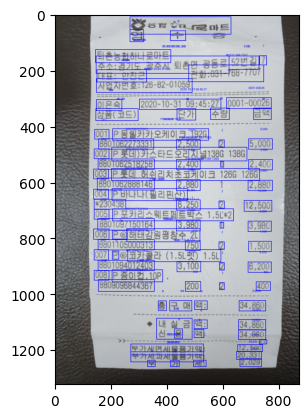

In [1]:
import cv2
import easyocr
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

reader = easyocr.Reader(['ko', 'en'])
result =  reader.readtext('bill1.png')

img = cv2.imread('bill1.png')

img = Image.fromarray(img)
draw = ImageDraw.Draw(img)

for i in result:
  x = i[0][0][0]
  y = i[0][0][1]
  w = i[0][1][0] - i[0][0][0]
  h = i[0][2][1] - i[0][1][1]

  draw.rectangle(((x, y), (x+w, y+h)), outline="blue", width=2)
  draw.text((int((x+x+w)/2), y-40), str(i[1]),  fill="blue")

plt.imshow(img)
plt.show()

https://davelogs.tistory.com/94

/var/folders/pw/w8rt727n6j51gnhj0dxq0xlw0000gn/T/ipykernel_48591/1883894905.py:33: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


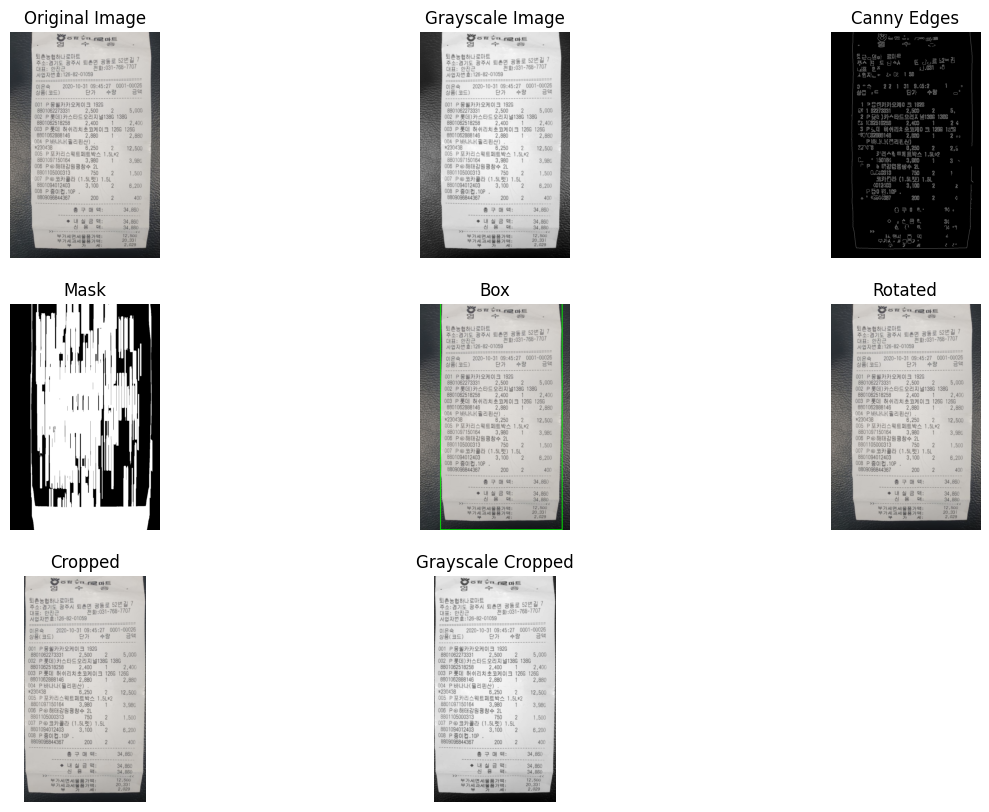

In [2]:
# 이미지 파일 경로 설정
image_path = 'bill1.png'  # 이미지 파일 이름

# 이미지를 읽어들이기
src = cv2.imread(image_path, 1)

# grayscale
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)

# canny
canned = cv2.Canny(gray, 150, 300)

# dilate to close holes in lines
kernel = np.ones((10, 1), np.uint8)  # 가로 1 세로 10
mask = cv2.dilate(canned, kernel, iterations=20)

# contours 찾기
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 가장 큰 contours 찾기
biggest_cntr = None
biggest_area = 0
for contour in contours:
    area = cv2.contourArea(contour)
    if area > biggest_area:
        biggest_area = area
        biggest_cntr = contour

# 외곽 box
rect = cv2.minAreaRect(biggest_cntr)
box = cv2.boxPoints(rect)
box = np.int0(box)

# 외곽 box 그리기
src_box = src.copy()
cv2.drawContours(src_box, [box], 0, (0, 255, 0), 3)

# angle 계산
angle = rect[-1]
if angle > 45:
    angle = -(90 - angle)

# 기울기 조정
rotated = src.copy()
(h, w) = rotated.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(rotated, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

# 회전된 박스 좌표 찾기
ones = np.ones(shape=(len(box), 1))
points_ones = np.hstack([box, ones])
transformed_box = M.dot(points_ones.T).T

y = [transformed_box[0][1], transformed_box[1][1], transformed_box[2][1], transformed_box[3][1]]
x = [transformed_box[0][0], transformed_box[1][0], transformed_box[2][0], transformed_box[3][0]]

y1, y2 = int(min(y)), int(max(y))
x1, x2 = int(min(x)), int(max(x))

# crop
crop = rotated[y1:y2, x1:x2]

# 흑백처리
gray2 = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)

# 이미지 출력
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(canned, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(cv2.cvtColor(src_box, cv2.COLOR_BGR2RGB))
plt.title('Box')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.title('Rotated')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
plt.title('Cropped')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(gray2, cmap='gray')
plt.title('Grayscale Cropped')
plt.axis('off')

plt.show()


In [3]:
src = cv2.imread('bill1.png', 1)

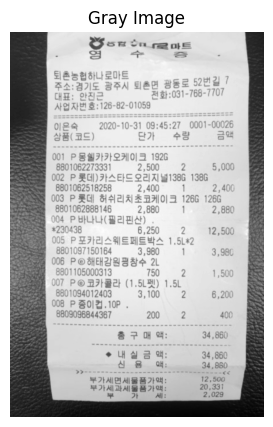

In [4]:
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)

# 이미지 출력
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray')
plt.title('Gray Image')
plt.axis('off')

plt.show()

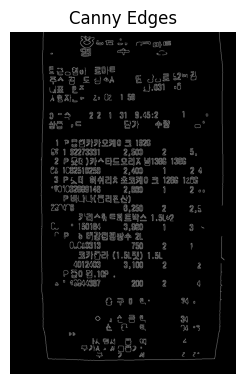

In [5]:
canned = cv2.Canny(gray, 150, 300)

plt.subplot(1, 2, 2)
plt.imshow(canned, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.show()

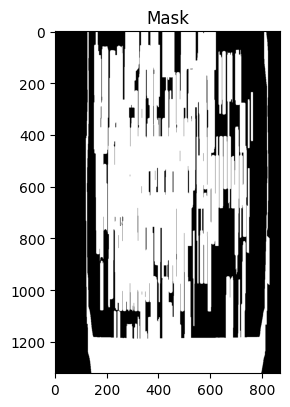

In [6]:
kernel = np.ones((10,1),np.uint8) # 가로 1 세로 10
mask = cv2.dilate(canned, kernel, iterations = 20)

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')

plt.show()

/var/folders/pw/w8rt727n6j51gnhj0dxq0xlw0000gn/T/ipykernel_48591/1160436821.py:16: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


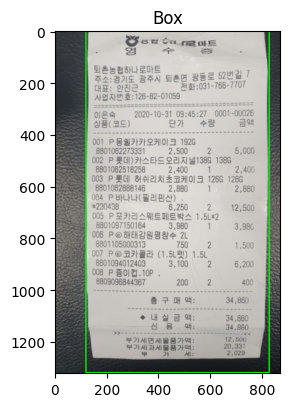

In [7]:
# contours 찾기
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 가장 큰 contours 찾기
biggest_cntr = None
biggest_area = 0
for contour in contours:
    area = cv2.contourArea(contour)
    if area > biggest_area:
        biggest_area = area
        biggest_cntr = contour

# 외곽 box
rect = cv2.minAreaRect(biggest_cntr)
box = cv2.boxPoints(rect)
box = np.int0(box)

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(src_box, cv2.COLOR_BGR2RGB))
plt.title('Box')

plt.show()

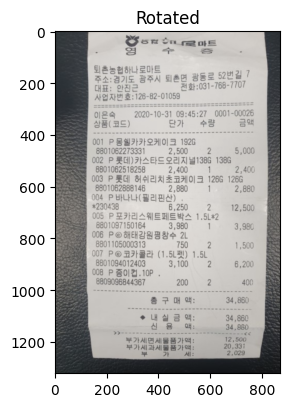

In [8]:
# angle 계산
angle = rect[-1]
if angle > 45:
    angle = -(90 - angle)

# 기울기 조정
rotated = src.copy()
(h, w) = rotated.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(rotated, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.title('Rotated')

plt.show()

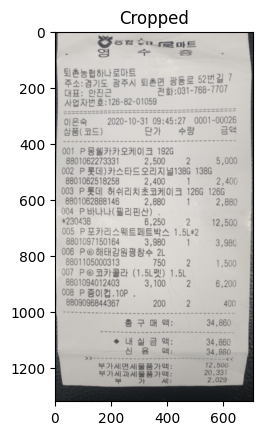

In [9]:
# 회전된 박스 좌표 찾기
ones = np.ones(shape=(len(box), 1))
points_ones = np.hstack([box, ones])
transformed_box = M.dot(points_ones.T).T

y = [transformed_box[0][1], transformed_box[1][1], transformed_box[2][1], transformed_box[3][1]]
x = [transformed_box[0][0], transformed_box[1][0], transformed_box[2][0], transformed_box[3][0]]

y1, y2 = int(min(y)), int(max(y))
x1, x2 = int(min(x)), int(max(x))

# crop
crop = rotated[y1:y2, x1:x2]

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
plt.title('Cropped')

plt.show()

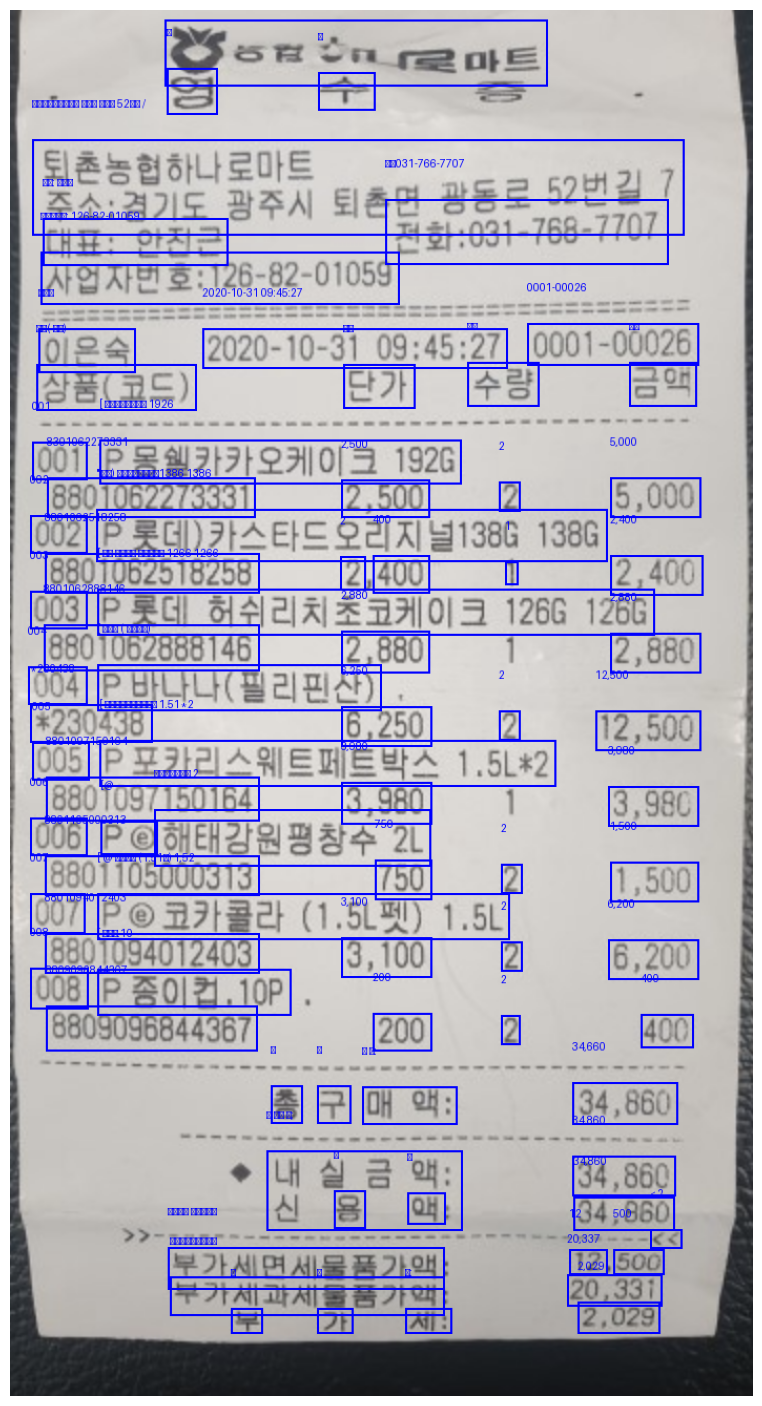

In [12]:
 # 전처리된 이미지를 EasyOCR로 처리하여 텍스트 인식
result = reader.readtext(crop)
reader = easyocr.Reader(['ko'])  # 한글 폰트 사용

# 파란색 상자를 그리기 위한 PIL 이미지로 변환
img = Image.fromarray(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
draw = ImageDraw.Draw(img)

# 각 텍스트 주위에 상자를 그리고 텍스트를 쓰기
for detection in result:
    bbox = detection[0]
    text = detection[1]
    # 상자 좌표
    x_min, y_min = bbox[0]
    x_max, y_max = bbox[2]
    # 파란색 상자 그리기
    draw.rectangle([x_min, y_min, x_max, y_max], outline="blue", width=2)
    # 텍스트 쓰기
    draw.text((x_min, y_min - 40), text, fill="blue")

# 이미지 출력
plt.figure(figsize=(25, 18))  # 이미지를 크게 표시하기 위해 figure 크기를 조정합니다

plt.imshow(img)
plt.axis('off')
plt.show()


# 여기까지 이미지 전처리

## 한글 + 숫자 

Using CPU. Note: This module is much faster with a GPU.


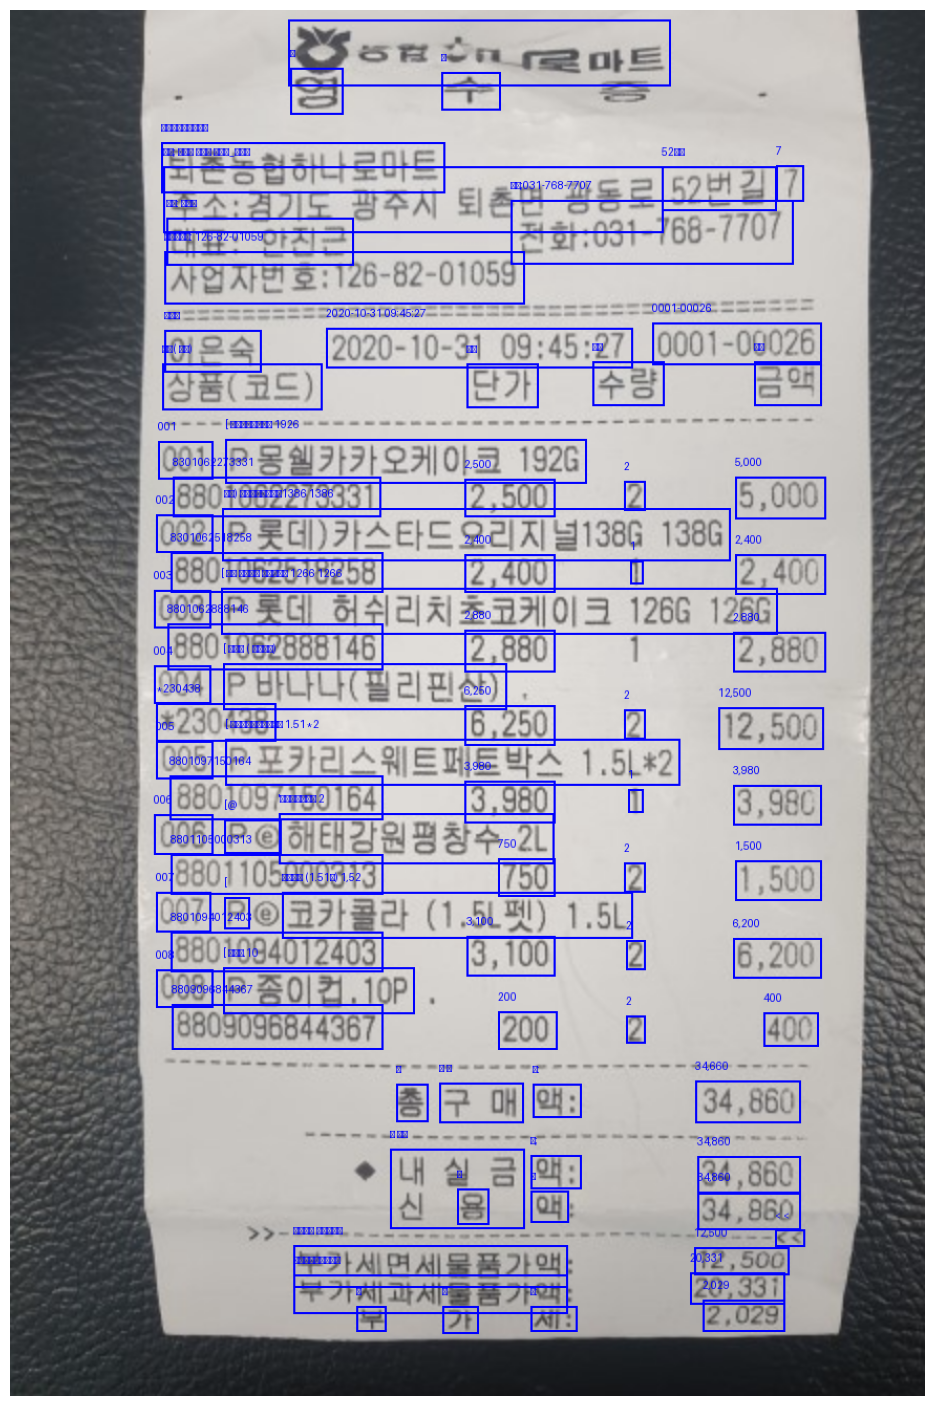

Extracted text has been saved to extracted_text.csv


In [27]:
import cv2
import easyocr
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import pandas as pd
import re

# EasyOCR reader 객체 생성 (한글 및 영어 지원)
reader = easyocr.Reader(['ko'], gpu=False)

def extract_text_from_image(image):
    """
    이미지를 처리하여 텍스트를 추출하고 박스를 그립니다.
    """
    # 이미지에서 텍스트 추출
    results = reader.readtext(image)
    
    # 파란색 상자를 그리기 위한 PIL 이미지로 변환
    img = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(img)

    # 추출된 텍스트를 저장할 리스트
    extracted_text = []
    
    # 각 텍스트 주위에 상자를 그리고 텍스트를 저장
    for detection in results:
        bbox = detection[0]
        text = detection[1]
        confidence = detection[2]
        
        # 필터링 조건 (필요에 따라 수정 가능)
        if re.match(r'^[0-9가-힣]+$', text):
            extracted_text.append(text)
        
        # 상자 좌표
        x_min, y_min = int(bbox[0][0]), int(bbox[0][1])
        x_max, y_max = int(bbox[2][0]), int(bbox[2][1])
        
        # 상자와 텍스트 색상 설정
        box_color = "blue"
        text_color = "blue"
        
        # 상자 그리기
        draw.rectangle([x_min, y_min, x_max, y_max], outline=box_color, width=2)
        # 텍스트 쓰기
        draw.text((x_min, y_min - 20), text, fill=text_color)
    
    # 이미지 출력
    plt.figure(figsize=(25, 18))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    return extracted_text

def save_text_to_csv(text_list, file_path):
    """
    텍스트 리스트를 CSV 파일로 저장합니다.
    """
    df = pd.DataFrame(text_list, columns=['Extracted Text'])
    df.to_csv(file_path, index=False, encoding='utf-8-sig')
    print(f"Extracted text has been saved to {file_path}")

# 이미지 파일 경로
image_path = 'bill1.png'

# 이미지 읽기
image = cv2.imread(image_path)
if image is None:
    raise Exception(f"Could not read the image from {image_path}")

# 텍스트 추출 및 박스 그리기
extracted_text = extract_text_from_image(image)

# CSV 파일로 저장
csv_file_path = 'extracted_text.csv'
save_text_to_csv(extracted_text, csv_file_path)


# 한글 + 영어 + 숫자

Using CPU. Note: This module is much faster with a GPU.


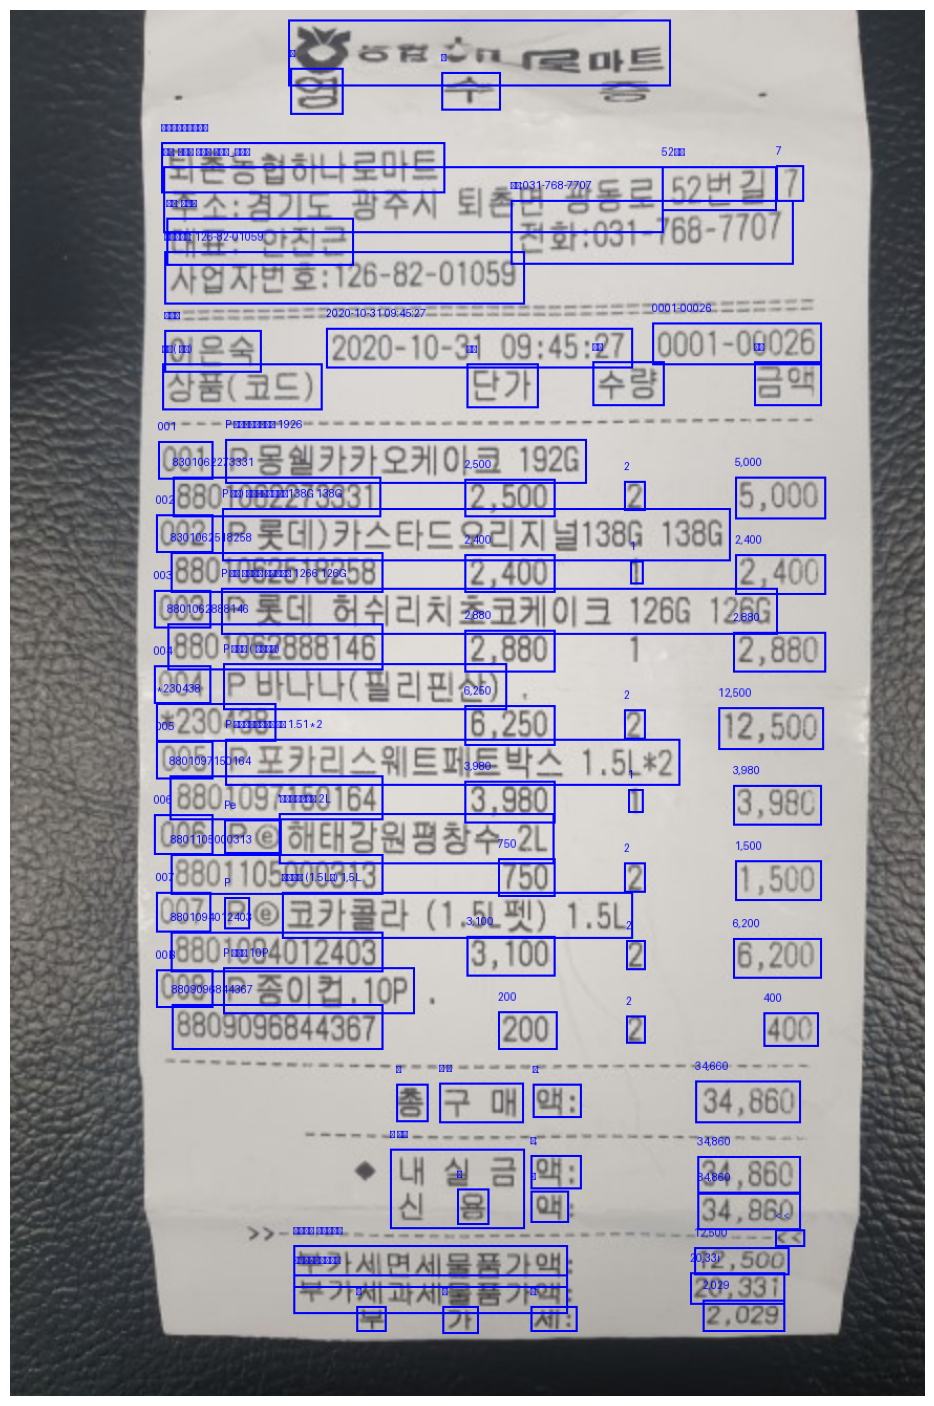

Extracted text has been saved to extracted_text.csv


In [28]:
import cv2
import easyocr
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import pandas as pd

# EasyOCR reader 객체 생성 (한글 및 영어 지원)
reader = easyocr.Reader(['ko', 'en'], gpu=False)

def extract_text_from_image(image):
    """
    이미지를 처리하여 텍스트를 추출하고 박스를 그립니다.
    """
    # 이미지에서 텍스트 추출
    results = reader.readtext(image)
    
    # 파란색 상자를 그리기 위한 PIL 이미지로 변환
    img = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(img)

    # 추출된 텍스트를 저장할 리스트
    extracted_text = []
    
    # 각 텍스트 주위에 상자를 그리고 텍스트를 저장
    for detection in results:
        bbox = detection[0]
        text = detection[1]
        confidence = detection[2]
        
        # 필터링 조건 (필요에 따라 수정 가능)
        extracted_text.append(text)
        
        # 상자 좌표
        x_min, y_min = int(bbox[0][0]), int(bbox[0][1])
        x_max, y_max = int(bbox[2][0]), int(bbox[2][1])
        
        # 상자와 텍스트 색상 설정
        box_color = "blue"
        text_color = "blue"
        
        # 상자 그리기
        draw.rectangle([x_min, y_min, x_max, y_max], outline=box_color, width=2)
        # 텍스트 쓰기
        draw.text((x_min, y_min - 20), text, fill=text_color)
    
    # 이미지 출력
    plt.figure(figsize=(25, 18))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    return extracted_text

def save_text_to_csv(text_list, file_path):
    """
    텍스트 리스트를 CSV 파일로 저장합니다.
    """
    df = pd.DataFrame(text_list, columns=['Extracted Text'])
    df.to_csv(file_path, index=False, encoding='utf-8-sig')
    print(f"Extracted text has been saved to {file_path}")

# 이미지 파일 경로
image_path = 'bill1.png'

# 이미지 읽기
image = cv2.imread(image_path)
if image is None:
    raise Exception(f"Could not read the image from {image_path}")

# 텍스트 추출 및 박스 그리기
extracted_text = extract_text_from_image(image)

# CSV 파일로 저장
csv_file_path = 'extracted_text.csv'
save_text_to_csv(extracted_text, csv_file_path)


### 사업자 번호 추출

In [38]:
import pandas as pd
import re

def load_text_from_csv(file_path):
    """
    CSV 파일에서 텍스트를 로드합니다.
    """
    df = pd.read_csv(file_path, encoding='utf-8-sig')
    return df['Extracted Text'].tolist()

def extract_business_numbers(text_list):
    """
    텍스트 리스트에서 사업자 번호를 추출합니다.
    """
    # 사업자 번호를 추출할 정규 표현식
    pattern = re.compile(r'\b\d{3}-\d{2}-\d{5}\b')
    
    business_numbers = []
    
    for text in text_list:
        matches = pattern.findall(text)
        business_numbers.extend(matches)
    
    return business_numbers

# CSV 파일 경로
csv_file_path = 'extracted_text.csv'

# CSV에서 텍스트 추출
extracted_text = load_text_from_csv(csv_file_path)

# 사업자 번호 추출
business_numbers = extract_business_numbers(extracted_text)
print("추출한 사업자 번호:", business_numbers)


추출한 사업자 번호: ['126-82-01059']


### 사업자 번호로 웹 크롤링

In [45]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup

def load_text_from_csv(file_path):
    """
    CSV 파일에서 텍스트를 로드합니다.
    """
    df = pd.read_csv(file_path, encoding='utf-8-sig')
    return df['Extracted Text'].tolist()

def extract_business_numbers(text_list):
    """
    텍스트 리스트에서 사업자 번호를 추출합니다.
    """
    # 사업자 번호를 추출할 정규 표현식
    pattern = re.compile(r'\b\d{3}-\d{2}-\d{5}\b')
    
    business_numbers = []
    
    for text in text_list:
        matches = pattern.findall(text)
        business_numbers.extend(matches)
    
    return business_numbers

def crawl_business_info(business_number):
    """
    사업자 번호를 사용하여 웹에서 정보를 크롤링합니다.
    """
    # 실제 웹사이트의 URL로 변경
    url = f"https://bizno.net/article/{business_number}"
    
    try:
        # 웹 페이지 요청
        response = requests.get(url)
        response.raise_for_status()
        
        # BeautifulSoup으로 HTML 파싱
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # <p> 태그 추출
        p_elements = soup.find_all('p')
        
        # <p> 내용 추출
        p_texts = [p.get_text(strip=True) for p in p_elements]
        
        return p_texts
    
    except requests.RequestException as e:
        print(f"Request failed: {e}")
        return []

def save_crawled_data(data, file_path):
    """
    크롤링한 데이터를 CSV 파일로 저장합니다.
    """
    # 데이터를 평면화하여 저장
    flattened_data = [(number, info) for number, infos in data for info in infos]
    df = pd.DataFrame(flattened_data, columns=['Business Number', 'Info'])
    df.to_csv(file_path, index=False, encoding='utf-8-sig')
    print(f"Data has been saved to {file_path}")

# CSV 파일 경로
csv_file_path = 'extracted_text.csv'

# CSV에서 텍스트 추출
extracted_text = load_text_from_csv(csv_file_path)

# 사업자 번호 추출
business_numbers = extract_business_numbers(extracted_text)
print("추출한 사업자 번호:", business_numbers)

# 사업자 번호를 사용하여 정보를 크롤링
crawled_data = [(number, crawl_business_info(number)) for number in business_numbers]

# CSV 파일로 저장
csv_file_path = 'crawled_business_data.csv'
save_crawled_data(crawled_data, csv_file_path)


추출한 사업자 번호: ['126-82-01059']
Data has been saved to crawled_business_data.csv


#### p태그로 소분류 크롤링 해야 됨.

In [50]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup

def crawl_business_info(business_number):
    """
    사업자 번호를 사용하여 웹에서 정보를 크롤링합니다.
    """
    url = f"https://bizno.net/article/{business_number}"
    
    try:
        response = requests.get(url)
        response.raise_for_status()
        
        # 웹 페이지의 인코딩 설정
        response.encoding = 'utf-8'  # 또는 웹 페이지의 실제 인코딩

        soup = BeautifulSoup(response.text, 'html.parser')

        # 웹 페이지 구조를 확인하기 위해 전체 HTML 출력
        # print(soup.prettify())  # Uncomment to debug

        # <p> 태그 추출
        p_elements = soup.find_all('p')
        
        # <p> 내용 추출
        p_texts = [p.get_text(strip=True) for p in p_elements]
        
        return p_texts
    
    except requests.RequestException as e:
        print(f"Request failed: {e}")
        return []

def save_crawled_data(data, file_path):
    """
    크롤링한 데이터를 CSV 파일로 저장합니다.
    """
    # 데이터를 평면화하여 저장
    flattened_data = [(number, info) for number, infos in data for info in infos]
    df = pd.DataFrame(flattened_data, columns=['Business Number', 'Info'])
    df.to_csv(file_path, index=False, encoding='utf-8-sig')
    print(f"Data has been saved to {file_path}")

# CSV 파일 경로
csv_file_path = 'extracted_text.csv'

# CSV에서 텍스트 추출
extracted_text = load_text_from_csv(csv_file_path)

# 사업자 번호 추출
business_numbers = extract_business_numbers(extracted_text)
print("추출한 사업자 번호:", business_numbers)

# 사업자 번호를 사용하여 정보를 크롤링
crawled_data = [(number, crawl_business_info(number)) for number in business_numbers]

# CSV 파일로 저장
csv_file_path = 'crawled_business_data.csv'
save_crawled_data(crawled_data, csv_file_path)


추출한 사업자 번호: ['126-82-01059']
Data has been saved to crawled_business_data.csv


### 저장해둔 데이터와 비교 및 개정과목 분류

In [ ]:
import pandas as pd

# 카테고리와 관련된 키워드를 정의
categories_keywords = {
    '식비': ['음식업', '카페', '밥', '커피'],
    '교통비': ['버스', '지하철', '택시', '주유소'],
    '문구류': ['펜', '공책', '파일', '연필'],
    # 다른 카테고리 및 키워드 추가 가능
}

def load_data(file_path):
    """
    CSV 파일에서 데이터를 로드합니다.
    """
    df = pd.read_csv(file_path, encoding='utf-8-sig')
    return df

def classify_text(text, categories_keywords):
    """
    텍스트를 카테고리와 키워드를 사용하여 분류합니다.
    """
    for category, keywords in categories_keywords.items():
        for keyword in keywords:
            if keyword in text:
                return category
    return '미분류'  # 카테고리에 해당하지 않는 경우

def classify_crawled_data(crawled_df, categories_keywords):
    """
    크롤링된 데이터를 카테고리로 분류합니다.
    """
    crawled_df['Category'] = crawled_df['Info'].apply(lambda text: classify_text(text, categories_keywords))
    return crawled_df

# 데이터 파일 경로
crawled_data_path = 'crawled_business_data.csv'

# 데이터 로드
crawled_data = load_data(crawled_data_path)

# 데이터 분류
classified_data = classify_crawled_data(crawled_data, categories_keywords)

# 결과 파일 경로
classified_data_path = 'classified_business_data.csv'

# 결과 저장
classified_data.to_csv(classified_data_path, index=False, encoding='utf-8-sig')
print(f"Classified data has been saved to '{classified_data_path}'")
